# 1st Milestone

**Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Data Collection**

In [ ]:

# Load the dataset
df = pd.read_csv('Tractor-Sales.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df.describe()

,Number of Tractor Sold
count,144.000000
mean,389.694444
std,171.500016
min,138.000000
25%,248.500000
50%,369.000000
75%,509.250000
max,871.000000


In [ ]:
# Convert 'Month-Year' to datetime format
df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%b-%y')

# Sort values by date
df = df.sort_values('Month-Year')

# Rename columns
df.rename(columns={'Month-Year': 'Date', 'Number of Tractor Sold': 'Tractor_Sales'}, inplace=True)


**Handling Nulls**

In [ ]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values if present
if missing_values.any():
    df.fillna(method='mean', inplace=True)  # Forward fill missing values


Missing Values:
 Date             0
Tractor_Sales    0
dtype: int64


**Cliping Outliers**

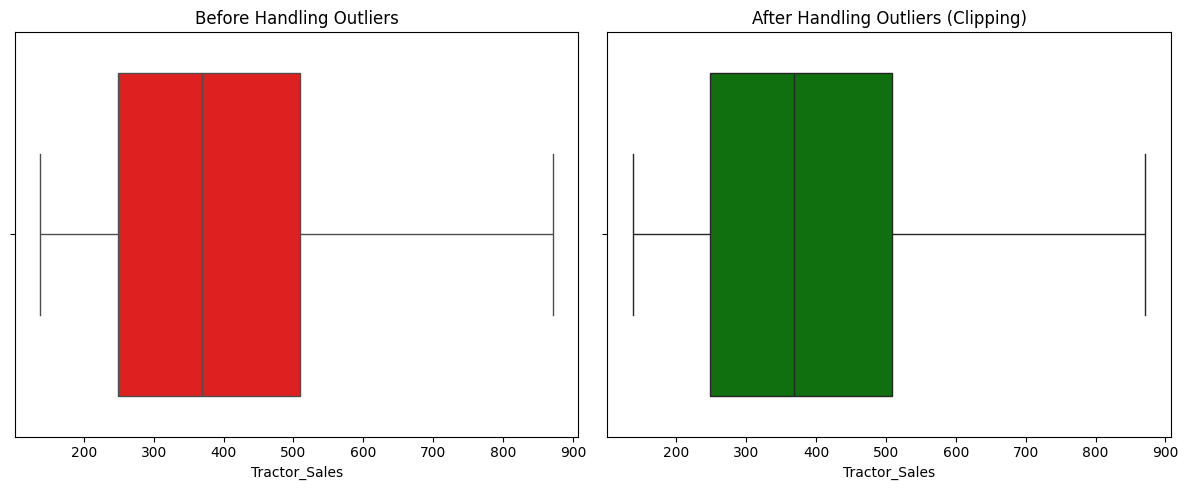

In [ ]:
plt.figure(figsize=(12, 5))
# Detect Outliers using IQR
Q1 = df['Tractor_Sales'].quantile(0.25)
Q3 = df['Tractor_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Before Handling Outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=df["Tractor_Sales"], color="red")
plt.title("Before Handling Outliers")

# After Handling Outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Tractor_Sales"].clip(lower=lower_bound, upper=upper_bound), color="green")
plt.title("After Handling Outliers (Clipping)")

plt.tight_layout()
plt.show()


**Skewness**

Skewness of Tractor Sales (before handling): 0.63
Right-skewed distribution


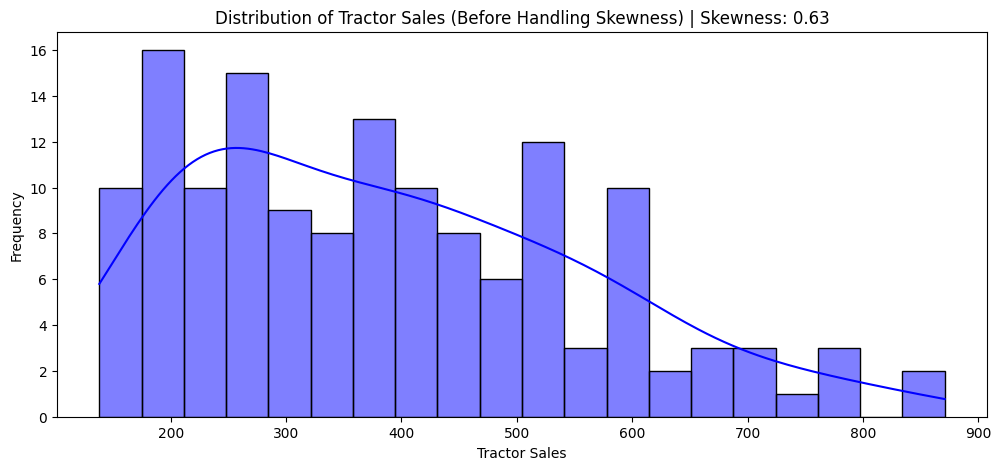

In [ ]:
import scipy.stats as stats
from scipy.stats import skew

# Check skewness
sales_skewness = skew(df['Tractor_Sales'])
print(f"Skewness of Tractor Sales (before handling): {sales_skewness:.2f}")
if sales_skewness > 0.5:
    print("Right-skewed distribution")
elif sales_skewness < -0.5:
    print("Left-skewed distribution")
else:
    print("Approximately symmetrical distribution")
# Plot histogram and KDE before transformation
plt.figure(figsize=(12, 5))
sns.histplot(df['Tractor_Sales'], kde=True, bins=20, color='blue', edgecolor='black')
plt.title(f"Distribution of Tractor Sales (Before Handling Skewness) | Skewness: {sales_skewness:.2f}")
plt.xlabel("Tractor Sales")
plt.ylabel("Frequency")
plt.show()




Skewness of Tractor Sales (after Log transformation): -0.11


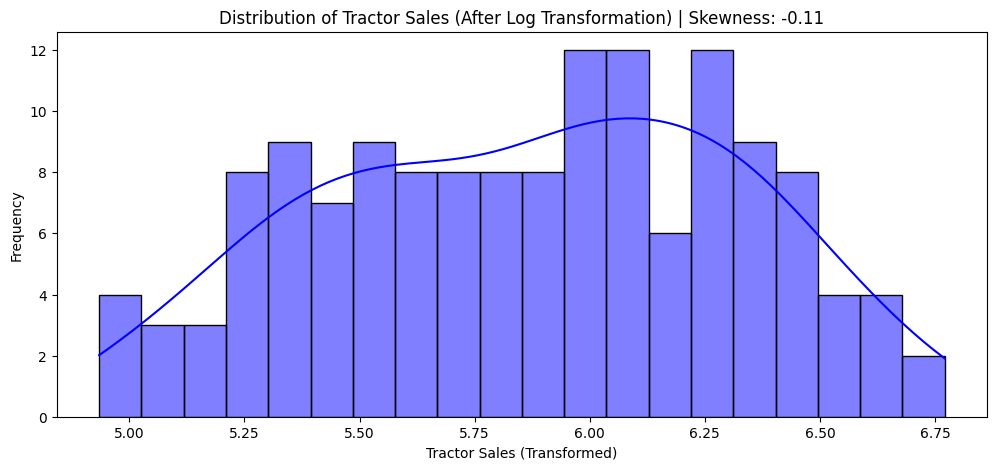

In [ ]:
# Apply transformation
df['Tractor_Sales'] = np.log1p(df['Tractor_Sales'])  # Log transformation for right-skewed data
transformation = "Log"

# Check skewness again
sales_skewness_after = skew(df['Tractor_Sales'])
print(f"Skewness of Tractor Sales (after {transformation} transformation): {sales_skewness_after:.2f}")

# Plot histogram and KDE after transformation
plt.figure(figsize=(12, 5))
sns.histplot(df['Tractor_Sales'], kde=True, bins=20, color='blue', edgecolor='black')
plt.title(f"Distribution of Tractor Sales (After {transformation} Transformation) | Skewness: {sales_skewness_after:.2f}")
plt.xlabel("Tractor Sales (Transformed)")
plt.ylabel("Frequency")
plt.show()


**EDA**

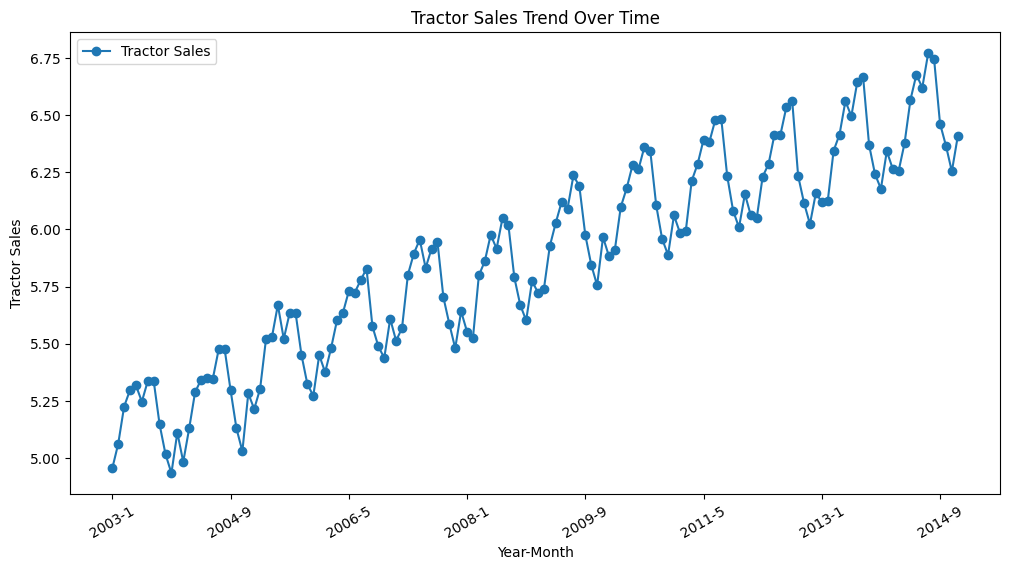

<ipython-input-9-53e7e7f8ffad>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Month'], y=df['Tractor_Sales'], palette="Blues")


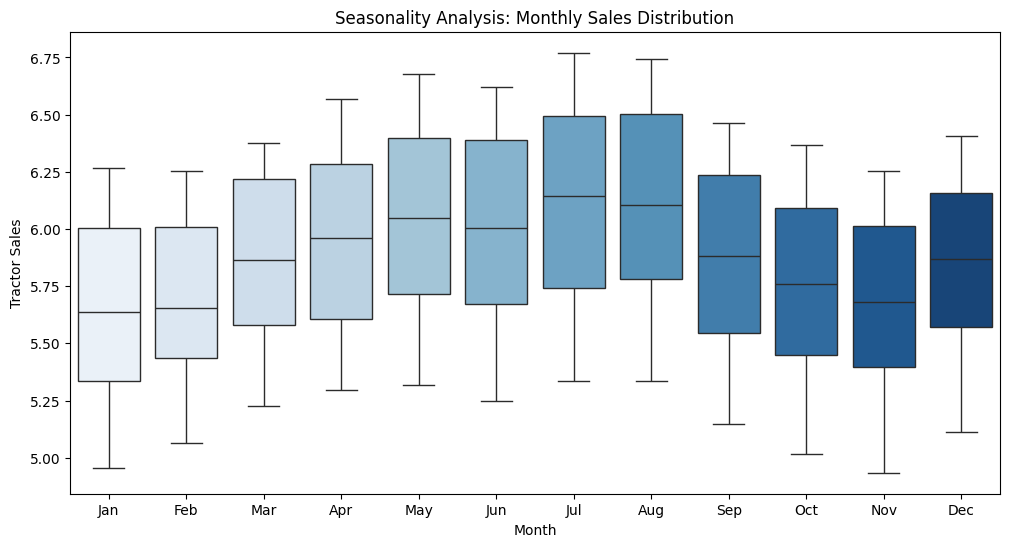

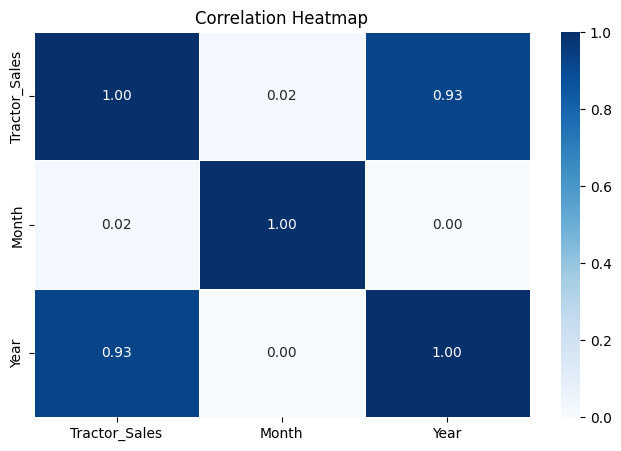

In [ ]:

# Extract year and month for seasonality analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Create additional time-based features
df['Quarter'] = df['Date'].dt.quarter
df['Week'] = df['Date'].dt.isocalendar().week
# Drop the original Date column
df_cleaned = df.drop(columns=['Date'])

# Save the cleaned dataset
df_cleaned.to_csv("Cleaned_Tractor_Sales.csv", index=False)

# Plot sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(df['Year'].astype(str) + '-' + df['Month'].astype(str), df['Tractor_Sales'], marker='o', label="Tractor Sales")
plt.xlabel("Year-Month")
plt.ylabel("Tractor Sales")
plt.title("Tractor Sales Trend Over Time")
plt.legend()
plt.xticks(rotation=30)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # Reduce the number of ticks for better visibility
plt.show()

# Monthly sales pattern across years
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Month'], y=df['Tractor_Sales'], palette="Blues")
plt.xlabel("Month")
plt.ylabel("Tractor Sales")
plt.title("Seasonality Analysis: Monthly Sales Distribution")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Compute correlation matrix
correlation_matrix = df[['Tractor_Sales', 'Month', 'Year']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



**Data Cleaned**

In [ ]:
df

,Date,Tractor_Sales,Year,Month,Quarter,Week
0,2003-01-01,4.955827,2003,1,1,1
1,2003-02-01,5.062595,2003,2,1,5
2,2003-03-01,5.225747,2003,3,1,9
3,2003-04-01,5.298317,2003,4,2,14
4,2003-05-01,5.318120,2003,5,2,18
...,...,...,...,...,...,...
139,2014-08-01,6.744059,2014,8,3,31
140,2014-09-01,6.463029,2014,9,3,36
141,2014-10-01,6.366470,2014,10,4,40
142,2014-11-01,6.253829,2014,11,4,44
